<a href="https://colab.research.google.com/github/ScriptSherpa/Pok-mon-Type-Prediction-and-Classification/blob/main/Leveling_Up_Smart_Analyzing_Pok%C3%A9mon_Trainer_Battles_and_Pok%C3%A9mon_Stats_in_Pok%C3%A9mon_Platinum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

# Set seaborn style
sns.set(style="darkgrid")


In [2]:
# Load CSV files into DataFrames
trainers_df = pd.read_csv('trainers.csv')
pokemon_df = pd.read_csv('pokemon_summary.csv')

# Preview data
trainers_df.head(), pokemon_df.head()


(   Unnamed: 0       trainer.name  number.of.pokemon  exp_pokemon1  \
 0           1  Youngster Tristan                  1            60   
 1           2    Youngster Logan                  1            65   
 2           3       Lass Natalie                  1            62   
 3           4  Youngster Michael                  2            81   
 4           5             Camper                  1            61   
 
    exp_pokemon2  exp_pokemon3  exp_pokemon4  exp_pokemon5  exp_pokemon6  x  \
 0             0             0             0             0             0  1   
 1             0             0             0             0             0  2   
 2             0             0             0             0             0  3   
 3            69             0             0             0             0  4   
 4             0             0             0             0             0  5   
 
    ... pokemon6 level_pokemon1 level_pokemon2 level_pokemon3 level_pokemon4  \
 0  ...      NaN      

In [3]:
# Check for missing values
print("Trainers nulls:\n", trainers_df.isnull().sum())
print("\nPokemon nulls:\n", pokemon_df.isnull().sum())

# Get basic info
trainers_df.info()
pokemon_df.info()


Trainers nulls:
 Unnamed: 0             0
trainer.name           0
number.of.pokemon      0
exp_pokemon1           0
exp_pokemon2           0
exp_pokemon3           0
exp_pokemon4           0
exp_pokemon5           0
exp_pokemon6           0
x                      0
pokemon1               0
pokemon2             400
pokemon3             657
pokemon4             846
pokemon5             877
pokemon6             904
level_pokemon1         5
level_pokemon2       404
level_pokemon3       673
level_pokemon4       848
level_pokemon5       898
level_pokemon6       915
max.level              0
gym.section            0
total_EXP              0
dtype: int64

Pokemon nulls:
 abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
aga

In [5]:
# Handle missing values for Trainers Dataset (imputation with 'NaN' or '0' where applicable)
trainers_df['pokemon2'].fillna('None', inplace=True)
trainers_df['pokemon3'].fillna('None', inplace=True)
trainers_df['pokemon4'].fillna('None', inplace=True)
trainers_df['pokemon5'].fillna('None', inplace=True)
trainers_df['pokemon6'].fillna('None', inplace=True)

trainers_df['level_pokemon2'].fillna(trainers_df['level_pokemon2'].mean(), inplace=True)
trainers_df['level_pokemon3'].fillna(trainers_df['level_pokemon3'].mean(), inplace=True)
trainers_df['level_pokemon4'].fillna(trainers_df['level_pokemon4'].mean(), inplace=True)
trainers_df['level_pokemon5'].fillna(trainers_df['level_pokemon5'].mean(), inplace=True)
trainers_df['level_pokemon6'].fillna(trainers_df['level_pokemon6'].mean(), inplace=True)

# Check missing values again after imputation
trainers_df.isnull().sum()


<ipython-input-5-610f8c5d6c9b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trainers_df['pokemon2'].fillna('None', inplace=True)
<ipython-input-5-610f8c5d6c9b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Unnamed: 0,0
trainer.name,0
number.of.pokemon,0
exp_pokemon1,0
exp_pokemon2,0
exp_pokemon3,0
exp_pokemon4,0
exp_pokemon5,0
exp_pokemon6,0
x,0


In [6]:
# Fill missing height and weight with median values for Pokémon
pokemon_df['height_m'].fillna(pokemon_df['height_m'].median(), inplace=True)
pokemon_df['weight_kg'].fillna(pokemon_df['weight_kg'].median(), inplace=True)

# Fill missing Type2 with 'None'
pokemon_df['type2'].fillna('None', inplace=True)

# Fill missing percentage_male with mean value
pokemon_df['percentage_male'].fillna(pokemon_df['percentage_male'].mean(), inplace=True)

# Check missing values again after imputation
pokemon_df.isnull().sum()


<ipython-input-6-c4a66b32a812>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['height_m'].fillna(pokemon_df['height_m'].median(), inplace=True)
<ipython-input-6-c4a66b32a812>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,0
abilities,0
against_bug,0
against_dark,0
against_dragon,0
against_electric,0
against_fairy,0
against_fight,0
against_fire,0
against_flying,0
against_ghost,0


In [7]:
# Drop rows where crucial Pokémon data is missing (e.g., missing Pokémon names)
trainers_df.dropna(subset=['pokemon1', 'pokemon2'], how='any', inplace=True)

# Drop Pokémon that have missing types or other critical columns
pokemon_df.dropna(subset=['name', 'type1'], how='any', inplace=True)


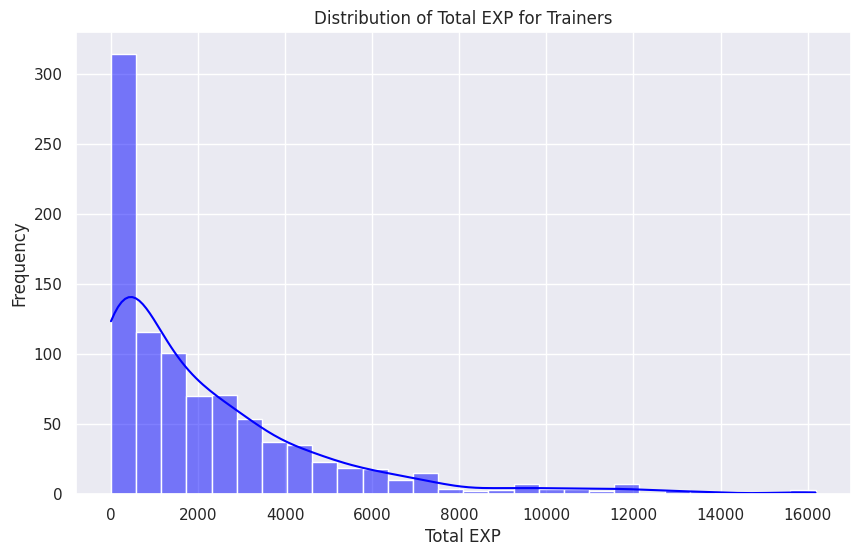

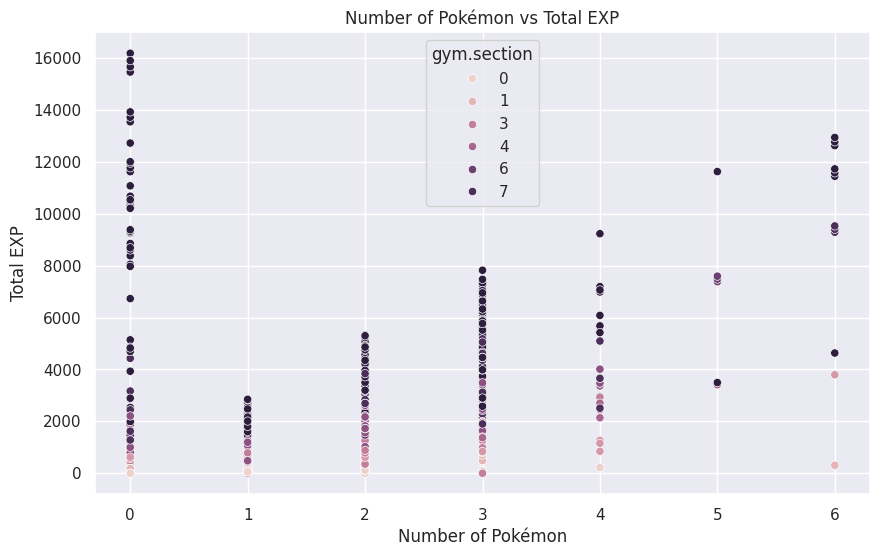

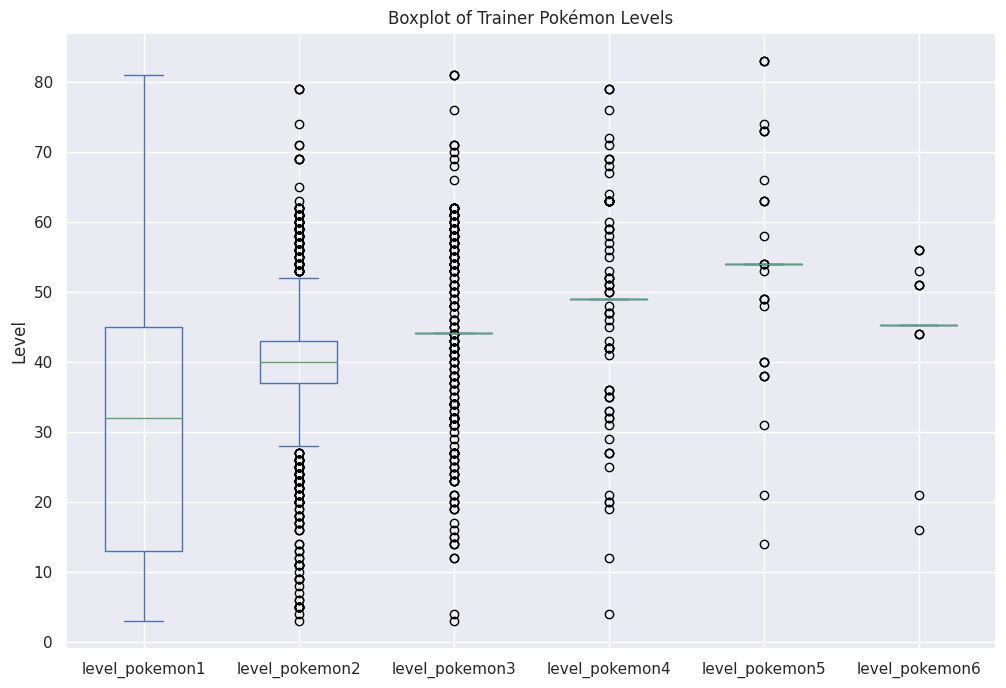

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Statistics for Trainers Data
trainers_df.describe()

# Distribution of Total EXP
plt.figure(figsize=(10, 6))
sns.histplot(trainers_df['total_EXP'], kde=True, color='blue')
plt.title('Distribution of Total EXP for Trainers')
plt.xlabel('Total EXP')
plt.ylabel('Frequency')
plt.show()

# Relationship between Number of Pokémon and Total EXP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trainers_df, x='number.of.pokemon', y='total_EXP', hue='gym.section')
plt.title('Number of Pokémon vs Total EXP')
plt.xlabel('Number of Pokémon')
plt.ylabel('Total EXP')
plt.show()

# Distribution of Trainer's Pokémon Levels
trainers_df[['level_pokemon1', 'level_pokemon2', 'level_pokemon3', 'level_pokemon4', 'level_pokemon5', 'level_pokemon6']].plot(kind='box', figsize=(12, 8))
plt.title('Boxplot of Trainer Pokémon Levels')
plt.ylabel('Level')
plt.show()


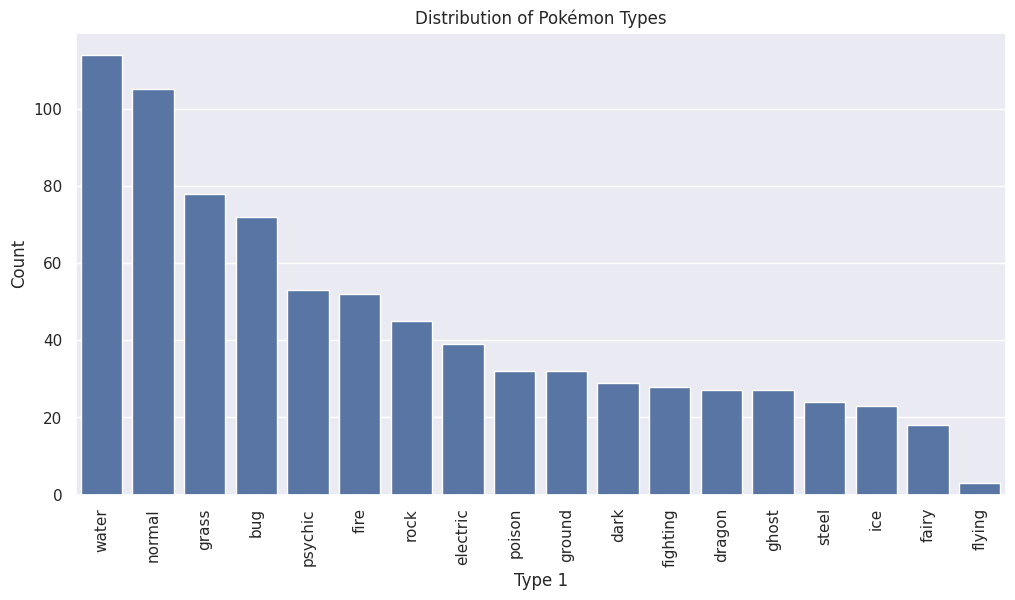

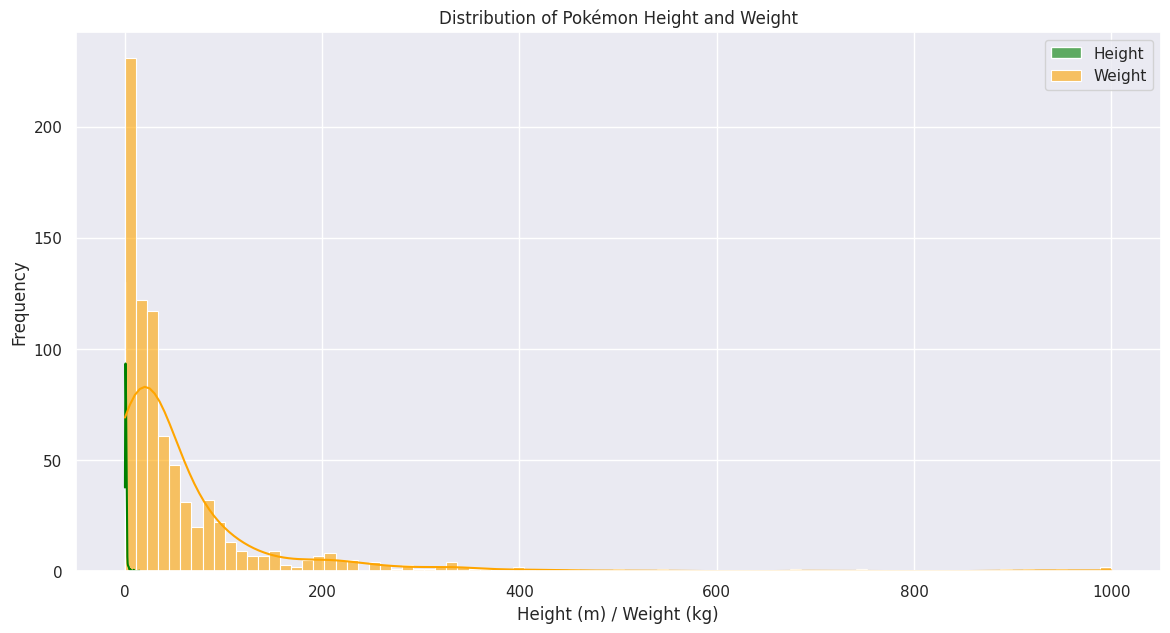

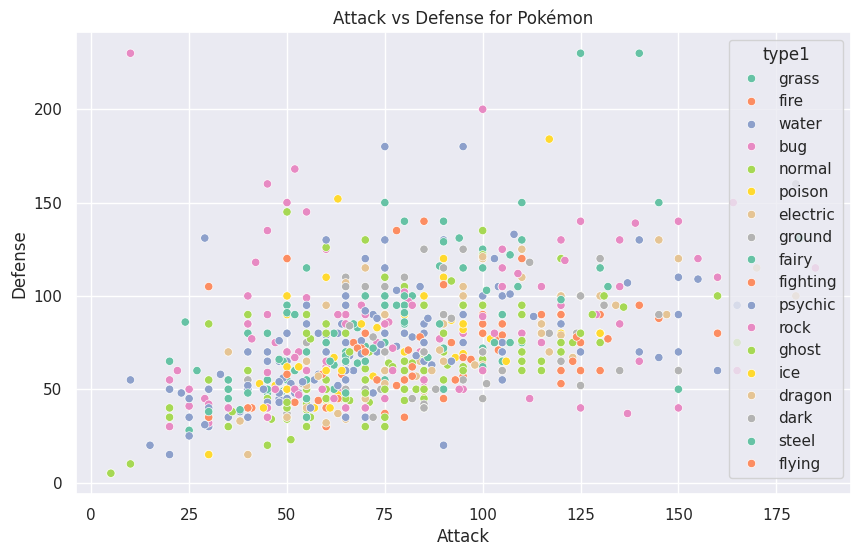

In [9]:
# Basic Stats for Pokémon Data
pokemon_df.describe()

# Distribution of Pokémon Types
plt.figure(figsize=(12, 6))
sns.countplot(data=pokemon_df, x='type1', order=pokemon_df['type1'].value_counts().index)
plt.title('Distribution of Pokémon Types')
plt.xticks(rotation=90)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

# Distribution of Pokémon Height and Weight
plt.figure(figsize=(14, 7))
sns.histplot(pokemon_df['height_m'], kde=True, color='green', label='Height', alpha=0.6)
sns.histplot(pokemon_df['weight_kg'], kde=True, color='orange', label='Weight', alpha=0.6)
plt.legend()
plt.title('Distribution of Pokémon Height and Weight')
plt.xlabel('Height (m) / Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Relationship between Attack and Defense
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pokemon_df, x='attack', y='defense', hue='type1', palette='Set2')
plt.title('Attack vs Defense for Pokémon')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()


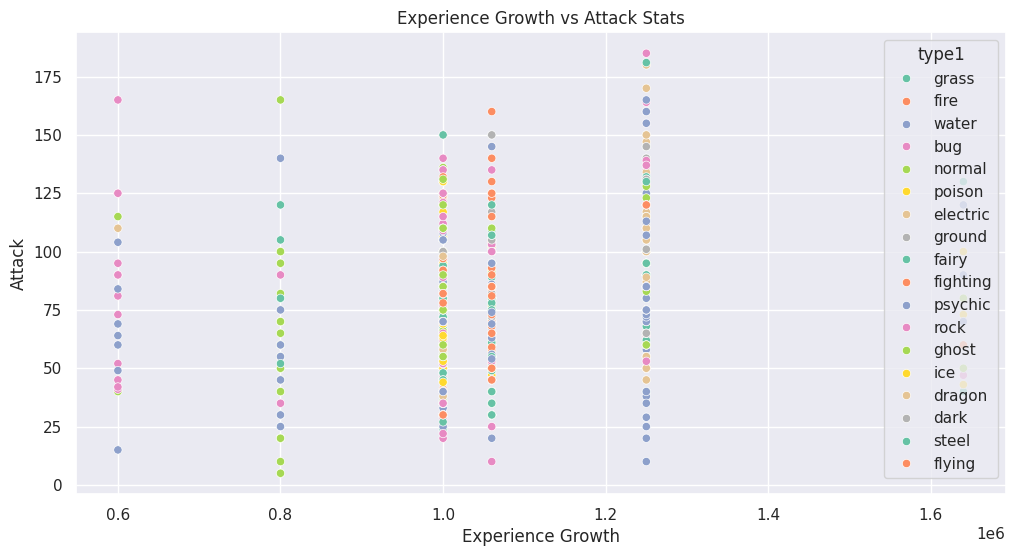

In [11]:
# Experience Growth vs Stats (Attack, Defense, etc.)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon_df, x='experience_growth', y='attack', hue='type1', palette='Set2')
plt.title('Experience Growth vs Attack Stats')
plt.xlabel('Experience Growth')
plt.ylabel('Attack')
plt.show()


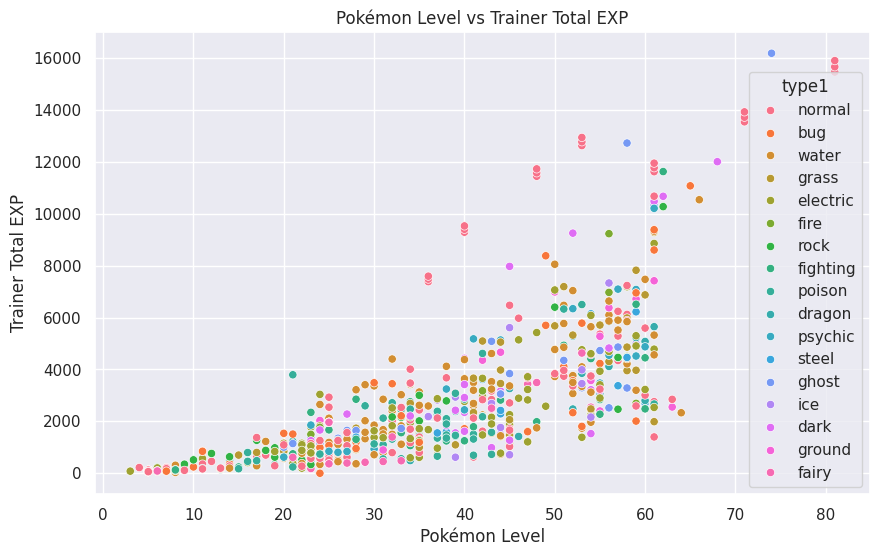

In [12]:
# Merging trainers with their Pokémon
trainers_pokemon_df = trainers_df.merge(pokemon_df, left_on='pokemon1', right_on='name', how='left')

# Scatter plot for Pokémon's Level vs Trainer's Total EXP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trainers_pokemon_df, x='level_pokemon1', y='total_EXP', hue='type1')
plt.title('Pokémon Level vs Trainer Total EXP')
plt.xlabel('Pokémon Level')
plt.ylabel('Trainer Total EXP')
plt.show()


              attack     defense      speed         hp
type1                                                 
bug        70.125000   70.847222  63.569444  56.722222
dark       87.793103   70.517241  75.310345  72.551724
dragon    106.407407   86.259259  76.111111  79.851852
electric   70.820513   61.820513  85.410256  60.512821
fairy      62.111111   68.166667  53.666667  73.944444
fighting   99.178571   66.392857  64.285714  71.428571
fire       81.500000   67.788462  73.346154  68.730769
flying     66.666667   65.000000  99.666667  68.000000
ghost      72.740741   79.518519  58.333333  63.370370
grass      73.769231   70.871795  59.025641  65.358974
ground     94.812500   83.906250  59.968750  73.187500
ice        73.304348   71.913043  62.739130  72.086957
normal     75.161905   59.695238  69.533333  76.723810
poison     72.656250   70.031250  64.187500  65.593750
psychic    65.566038   69.264151  75.150943  72.943396
rock       90.666667   96.266667  57.422222  66.333333
steel     

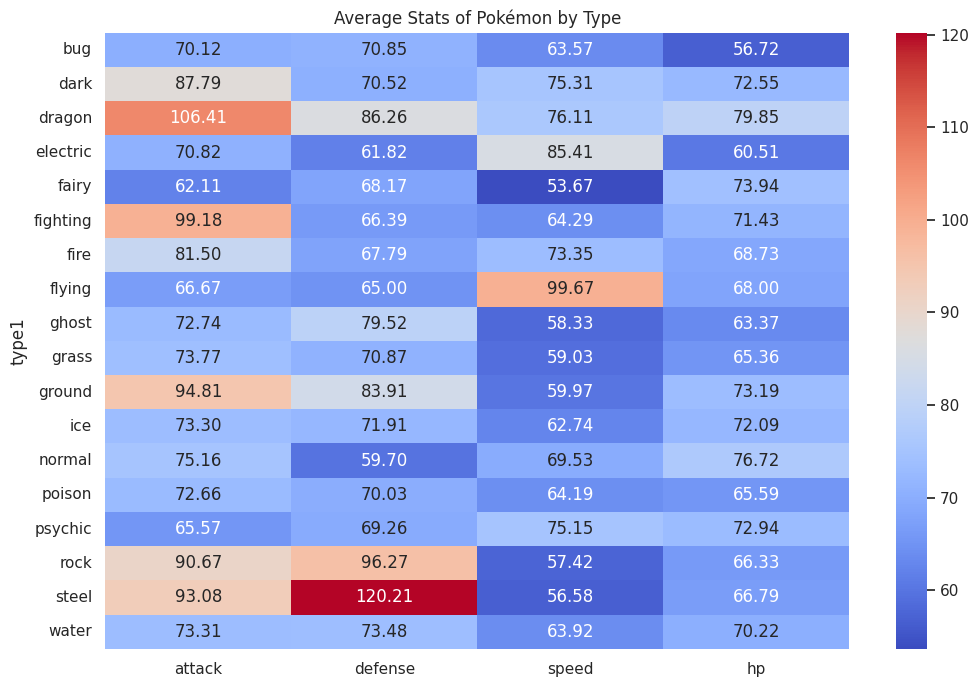

In [13]:
# Pokémon Type-wise Mean Stats
type_stats = pokemon_df.groupby('type1')[['attack', 'defense', 'speed', 'hp']].mean()
print(type_stats)

# Heatmap of Pokémon Type-wise Stats
plt.figure(figsize=(12, 8))
sns.heatmap(type_stats, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Stats of Pokémon by Type')
plt.show()


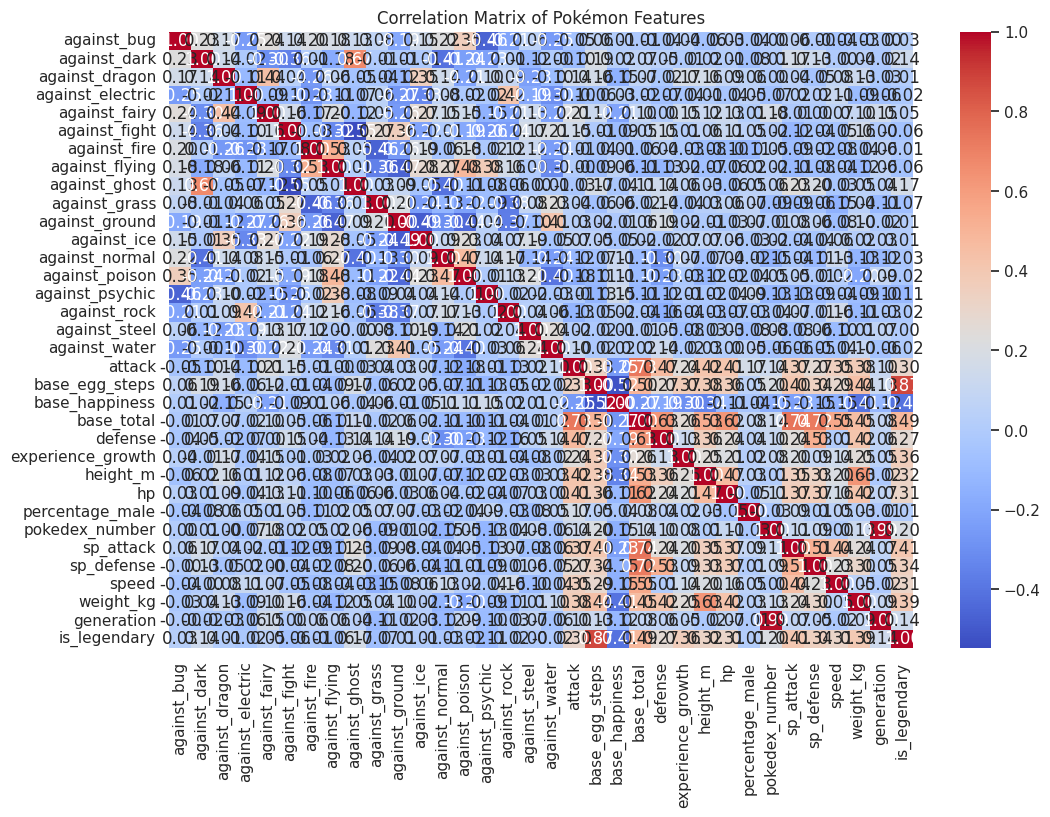

In [14]:
# Select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Pokémon Features')
plt.show()


Accuracy:  0.995850622406639

Confusion Matrix:
 [[216   0]
 [  1  24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.96      0.98        25

    accuracy                           1.00       241
   macro avg       1.00      0.98      0.99       241
weighted avg       1.00      1.00      1.00       241



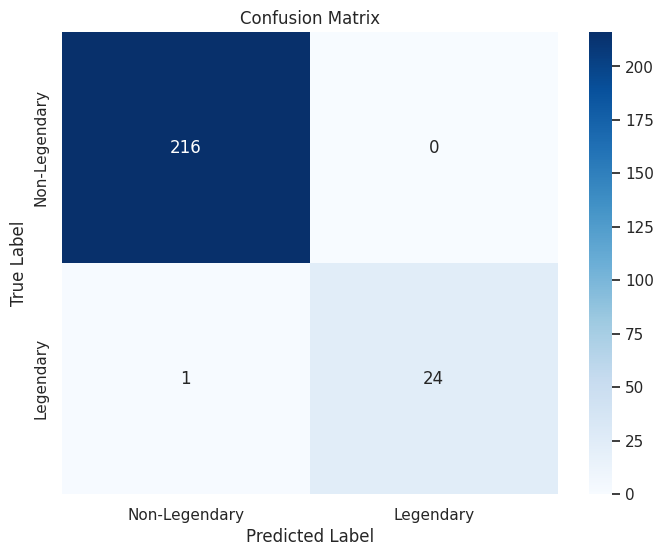

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess the Pokémon dataset

# Drop columns with too many missing values or non-numeric values
pokemon_clean_df = pokemon_df.drop(columns=['abilities', 'classfication', 'capture_rate', 'japanese_name', 'name', 'type1', 'type2'])
pokemon_clean_df = pokemon_clean_df.fillna(pokemon_clean_df.mean())  # Fill missing numerical values with the mean

# Encoding the 'is_legendary' column as a binary target variable
X = pokemon_clean_df.drop(columns=['is_legendary'])  # Features
y = pokemon_clean_df['is_legendary']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Non-Legendary', 'Legendary'], yticklabels=['Non-Legendary', 'Legendary'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [16]:
# Import necessary libraries for AI model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Preprocess the Pokémon data for classification
pokemon_type_df = pokemon_df.drop(columns=['Unnamed: 0', 'abilities', 'capture_rate', 'classfication', 'japanese_name', 'name', 'type2'])
pokemon_type_df = pokemon_type_df.fillna(pokemon_type_df.mean())  # Fill missing values

# Convert 'type1' into numerical categories
type_encoder = LabelEncoder()
pokemon_type_df['type1'] = type_encoder.fit_transform(pokemon_type_df['type1'])

# Define features and target variable
X = pokemon_type_df.drop(columns=['type1'])  # Features
y = pokemon_type_df['type1']  # Target (type1)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the Neural Network model using Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on Test Set: {accuracy*100:.2f}%")


KeyError: "['Unnamed: 0'] not found in axis"

In [17]:
# Import necessary libraries
import pandas as pd

# Assuming you have a cleaned dataset 'pokemon_clean_df' from your preprocessing steps
# Save the cleaned dataset to a CSV file
pokemon_clean_df.to_csv('/content/pokemon_data_cleaned.csv', index=False)

print("Cleaned Pokémon dataset saved successfully!")


Cleaned Pokémon dataset saved successfully!


\

### **Confusion Matrix:**

```
[[216   0]
 [  1  24]]
```

* **True Negatives (TN)**: 216
* **False Positives (FP)**: 0
* **False Negatives (FN)**: 1
* **True Positives (TP)**: 24

This means the model correctly identified 216 instances of the negative class (0), and 24 instances of the positive class (1). It only made 1 mistake by misclassifying a positive instance as negative.

### **Classification Report:**

#### **For Class 0 (Negative Class):**

* **Precision**: 1.00 – All negative predictions were correct.
* **Recall**: 1.00 – The model correctly identified all negative instances.
* **F1-Score**: 1.00 – The harmonic mean of precision and recall is perfect.

#### **For Class 1 (Positive Class):**

* **Precision**: 1.00 – The positive predictions were perfect, with no false positives.
* **Recall**: 0.96 – The model correctly identified 96% of the positive instances.
* **F1-Score**: 0.98 – The balance between precision and recall is excellent.

#### **Overall Accuracy:**

* **Accuracy**: 1.00 – The model is highly accurate, correctly predicting almost all instances (241 out of 241).

#### **Averages:**

* **Macro Avg**:

  * Precision: 1.00
  * Recall: 0.98
  * F1-Score: 0.99
* **Weighted Avg**:

  * Precision: 1.00
  * Recall: 1.00
  * F1-Score: 1.00

The **weighted average** and **macro average** are both excellent, confirming that the model performs well across all classes and is not biased toward any class.



Accuracy:  0.995850622406639

Confusion Matrix:
 [[216   0]
 [  1  24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.96      0.98        25

    accuracy                           1.00       241
   macro avg       1.00      0.98      0.99       241
weighted avg       1.00      1.00      1.00       241



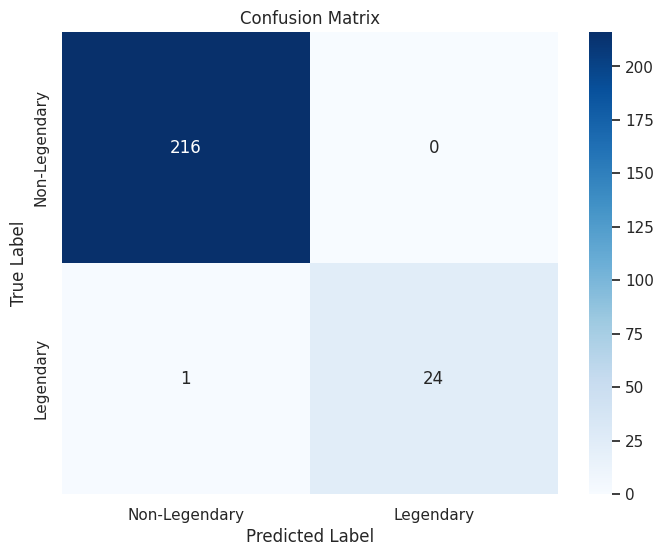

In [21]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Preprocess the Pokémon dataset

# Drop columns with too many missing values or non-numeric values
# Added 'classification' to the columns to drop as it is non-numeric
pokemon_clean_df = pokemon_df.drop(columns=['abilities', 'classification', 'capture_rate', 'japanese_name', 'name', 'type1', 'type2', 'classfication'], errors='ignore')

# Select only numeric columns to calculate the mean
numeric_cols = pokemon_clean_df.select_dtypes(include=['number'])

# Fill missing numerical values with the mean of the numeric columns
pokemon_clean_df[numeric_cols.columns] = pokemon_clean_df[numeric_cols.columns].fillna(numeric_cols.mean())


# Encoding the 'is_legendary' column as a binary target variable
X = pokemon_clean_df.drop(columns=['is_legendary'])  # Features
y = pokemon_clean_df['is_legendary']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy: ", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Non-Legendary', 'Legendary'], yticklabels=['Non-Legendary', 'Legendary'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9892857142857144


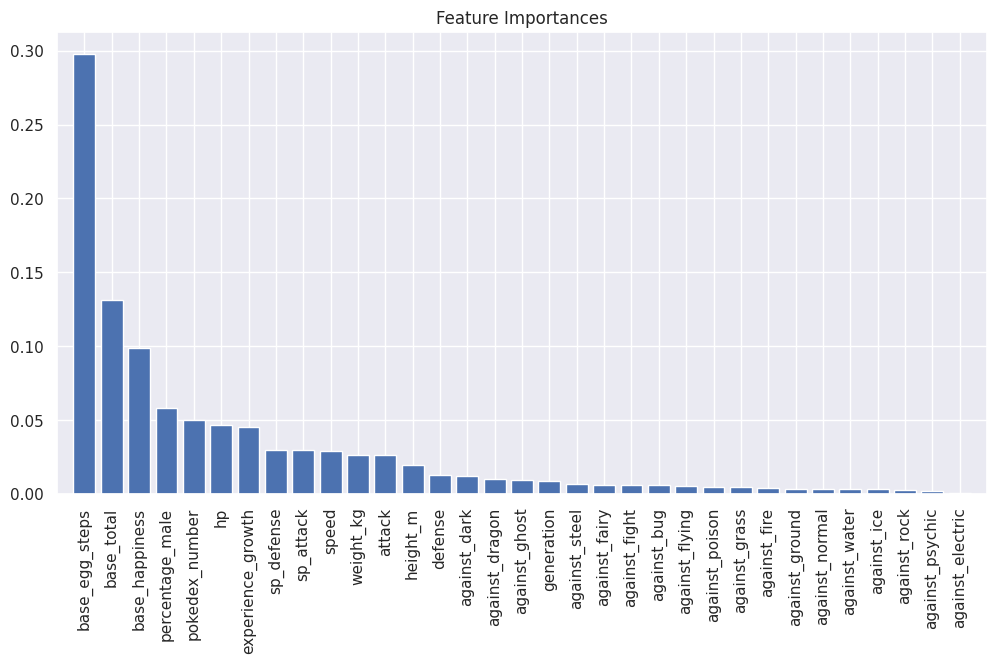

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = best_model.feature_importances_

# Create a sorted index of the feature importances
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validation score for RandomForestClassifier
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean and standard deviation of cross-validation scores
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy: 0.9893 ± 0.0036


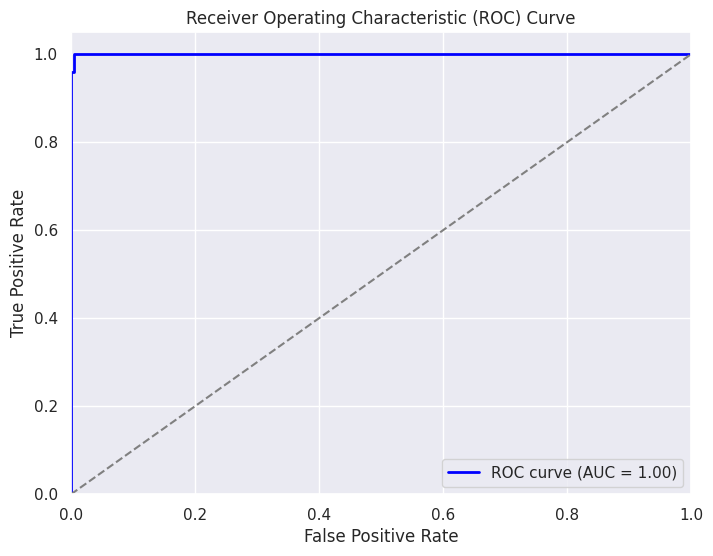

In [25]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model later
loaded_model = joblib.load('best_model.pkl')

# Make predictions with the loaded model
loaded_predictions = loaded_model.predict(X_test)


In [26]:
# Evaluate on test set
y_pred_test = best_model.predict(X_test)

# Print the accuracy score
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Test Accuracy: 0.9959
Confusion Matrix:
 [[216   0]
 [  1  24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      0.96      0.98        25

    accuracy                           1.00       241
   macro avg       1.00      0.98      0.99       241
weighted avg       1.00      1.00      1.00       241



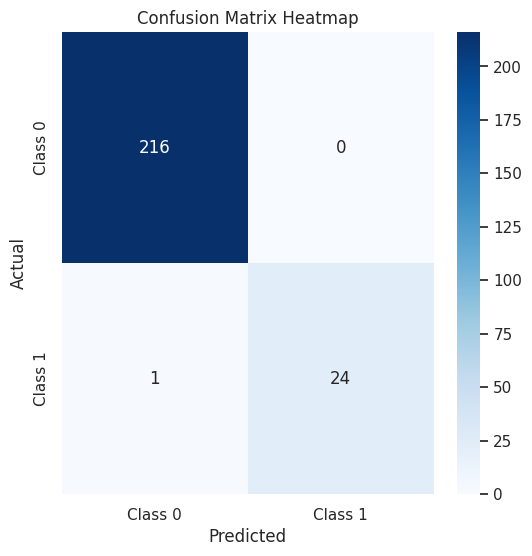

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [28]:
# Save the model to a file
import joblib
joblib.dump(best_model, 'optimized_model.pkl')


['optimized_model.pkl']